In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
# Read Data file CSV
df = pd.read_csv("ispu_dki1.csv")

In [103]:
def data ():
  print("====== Menampilkan 5 baris pertama ======")
  head = print(df.head())
  print("====== Memeriksa dimensi data ======")
  shape = print(df.shape)
  print("====== Menampilkan tipe data pada tiap kolom ======")
  info = print(df.info())
  print("//////////====== Memulai Explorasi Data ======////////////")
  print("====== Statistik Deskriptif ======")
  describe = print(df.describe())
  print ("====== Memeriksa missing value ======")
  isnull = print(df.isnull().sum())
  
  return head, shape, info, describe, isnull

In [104]:
data()

====== Menampilkan 5 baris pertama ======
      tanggal             stasiun  pm10  so2    co    o3   no2   max critical  \
0  2010-01-01  DKI1 (Bunderan HI)  60.0  4.0  73.0  27.0  14.0  73.0       CO   
1  2010-01-02  DKI1 (Bunderan HI)  32.0  2.0  16.0  33.0   9.0  33.0       O3   
2  2010-01-03  DKI1 (Bunderan HI)  27.0  2.0  19.0  20.0   9.0  27.0     PM10   
3  2010-01-04  DKI1 (Bunderan HI)  22.0  2.0  16.0  15.0   6.0  22.0     PM10   
4  2010-01-05  DKI1 (Bunderan HI)  25.0  2.0  17.0  15.0   8.0  25.0     PM10   

  categori  pm25  
0   SEDANG   NaN  
1     BAIK   NaN  
2     BAIK   NaN  
3     BAIK   NaN  
4     BAIK   NaN  
====== Memeriksa dimensi data ======
(4383, 11)
====== Menampilkan tipe data pada tiap kolom ======
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4383 entries, 0 to 4382
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tanggal   4383 non-null   object 
 1   stasiun   4383 non-null   ob

(None, None, None, None, None)

<!-- Menangani Missing Value -->

In [105]:
# df_cleanup = df.dropna()

df_cleanup = df.dropna()

# print(df_cleanup.isnull().sum())
# print(df_cleanup.isnull().sum())

<!-- Pembersihan Data -->

In [108]:
print(df_cleanup.head())
df_cleanup['tanggal'] = pd.to_datetime(df_cleanup['tanggal'], format="ISO8601")

         tanggal             stasiun  pm10   so2   co    o3   no2   max  \
4018  2021-01-01  DKI1 (Bunderan HI)  38.0  29.0  6.0  31.0  13.0  53.0   
4019  2021-01-02  DKI1 (Bunderan HI)  27.0  27.0  7.0  47.0   7.0  47.0   
4020  2021-01-03  DKI1 (Bunderan HI)  44.0  25.0  7.0  40.0  13.0  58.0   
4021  2021-01-04  DKI1 (Bunderan HI)  30.0  24.0  4.0  32.0   7.0  48.0   
4022  2021-01-05  DKI1 (Bunderan HI)  38.0  24.0  6.0  31.0   9.0  53.0   

     critical categori  pm25  
4018     PM25   SEDANG  53.0  
4019       O3     BAIK  46.0  
4020     PM25   SEDANG  58.0  
4021     PM25     BAIK  48.0  
4022     PM25   SEDANG  53.0  


C:\Users\mukhl\AppData\Local\Temp\ipykernel_17252\1623770844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleanup['tanggal'] = pd.to_datetime(df_cleanup['tanggal'], format="ISO8601")


<!-- Visualisasi Data -->

In [123]:
df_cleanup.head()
print(df.columns)

Index(['tanggal', 'stasiun', 'pm10', 'so2', 'co', 'o3', 'no2', 'max',
       'critical', 'categori', 'pm25'],
      dtype='object')


In [128]:
kategori_counts = df.groupby('categori').size()
print(kategori_counts)



categori
BAIK              1054
SEDANG            3065
TIDAK ADA DATA     110
TIDAK SEHAT        154
dtype: int64


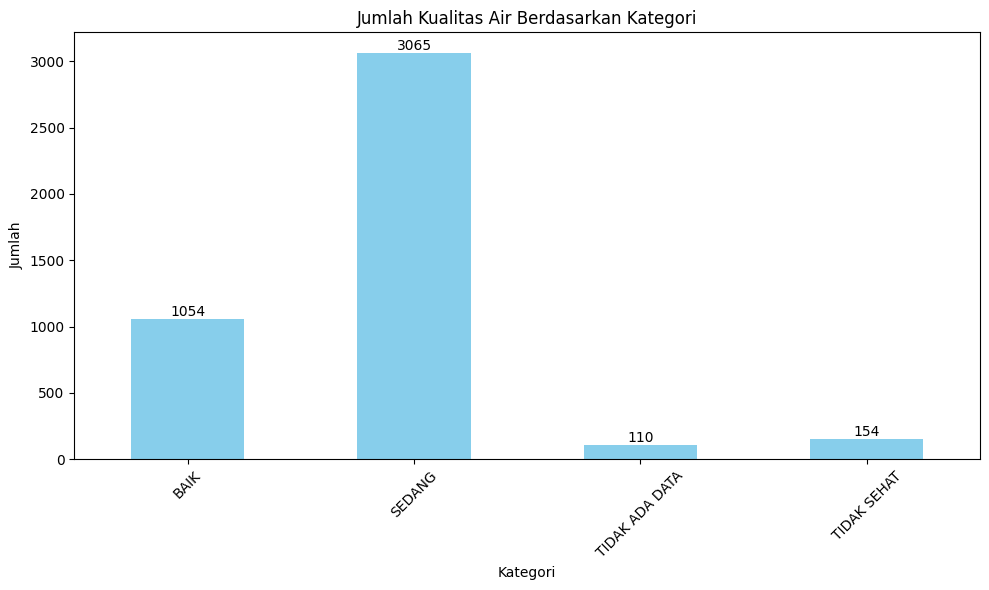

In [130]:
# Membuat histogram
plt.figure(figsize=(10, 6))
bars = kategori_counts.plot(kind='bar', color='skyblue')

# Menambahkan judul dan label sumbu
plt.title('Jumlah Kualitas Air Berdasarkan Kategori')
plt.xlabel('Kategori')
plt.ylabel('Jumlah')

# Menambahkan anotasi pada setiap batang
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, str(height), ha='center', va='bottom')

# Menampilkan grafik
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


<!-- Analisis Mendalam -->